Finding MC samples with anomalously high weights

In [14]:
import uproot
import hist
import numpy as np
import matplotlib.pyplot as plt
import glob
from pathlib import Path

In [53]:
# find anomalous high weights compared to rest of weights in histogram
def checkHistWeights(h):
    """ h must be a uproot TH1D """
    if h.all_members["fEntries"] < 100:
        return True
    with np.errstate(divide="ignore", invalid="ignore"):
        return not np.any(h.variances()/np.mean(h.variances()) > 100)

def checkWeightInPrePlot(path:str):
    f = uproot.open(path)
    count_bad = 0
    for key in f.keys():
        if not ("_up" in key) and not ("_down" in key):
            res = checkHistWeights(f[key].to_hist())
            if not res:
                count_bad += 1
                print(path)
            
    return count_bad

# does not do anything useful
def compareSamplesMaximum(base_path:str, cat_prod:str, feature_name:str):
    for dataset_path in Path(base_path).iterdir():
        dataset = dataset_path.name
        maximums = []
        files = []
        for file in (dataset_path / cat_prod).glob("data_*.root"):
            files.append(file)
            with uproot.open(file) as f:
                h = f[feature_name]
                maximums.append(np.max(h.variances()))
        if max(maximums) > 2*np.mean(maximums):
            print(f"{dataset} {files[np.argmax(maximums)]}")

def dataEvtsPerMCEvent(base_path:str, cat_prod:str, feature_name:str):
    for dataset_path in Path(base_path).iterdir():
        dataset = dataset_path.name
        ratios = []
        for file in (dataset_path / cat_prod).glob("data_*.root"):
            with uproot.open(file) as f:
                h = f[feature_name]
                ratios.append(np.sum(h.values())/h.all_members["fEntries"])
        print(f"{dataset} {np.mean(ratios)}")

In [36]:
for file in glob.glob("/grid_mnt/data__data.polcms/cms/vernazza/cmt/PrePlot2D/ul_2017_ZZ_v12/*/cat_base/prod_240318/data_*.root"):
    checkWeightInPrePlot(file)

/grid_mnt/data__data.polcms/cms/vernazza/cmt/PrePlot2D/ul_2017_ZZ_v12/tt_fh/cat_base/prod_240318/data_96.root
/grid_mnt/data__data.polcms/cms/vernazza/cmt/PrePlot2D/ul_2017_ZZ_v12/dy_0j/cat_base/prod_240318/data_18.root
/grid_mnt/data__data.polcms/cms/vernazza/cmt/PrePlot2D/ul_2017_ZZ_v12/zz_qnu/cat_base/prod_240318/data_1.root


In [38]:
for file in glob.glob("/grid_mnt/data__data.polcms/cms/cuisset/cmt/PrePlot2D/ul_*_Z*_v12/*/cat_base/prod_240318/data_*.root"):
    checkWeightInPrePlot(file)

/grid_mnt/data__data.polcms/cms/cuisset/cmt/PrePlot2D/ul_2017_ZbbHtt_v12/wjets_MLM/cat_base/prod_240318/data_0.root
/grid_mnt/data__data.polcms/cms/cuisset/cmt/PrePlot2D/ul_2017_ZttHbb_v12/wjets_MLM/cat_base/prod_240318/data_0.root
/grid_mnt/data__data.polcms/cms/cuisset/cmt/PrePlot2D/ul_2016_HIPM_ZbbHtt_v12/zz_qnu/cat_base/prod_240318/data_0.root
/grid_mnt/data__data.polcms/cms/cuisset/cmt/PrePlot2D/ul_2016_HIPM_ZttHbb_v12/zz_qnu/cat_base/prod_240318/data_0.root


In [54]:
dataEvtsPerMCEvent("/grid_mnt/data__data.polcms/cms/vernazza/cmt/PrePlot2D/ul_2017_ZZ_v12", "cat_base/prod_240318", "Ztt_svfit_mass_ellipse_Zbb_mass_ellipse")

ttzh 0.8146576626326417
ttz_qq 0.4150548952749032
ttww 0.7586954100544205
zz_sl_background 3.9726794384407618
dy_ptz2 1181.8085195303463
ttzz 0.786212436052412
ww_qqqq 60.186969510826664
zz_bbtt 3.7680660932632315
ttwz 0.7670432308169727
wplush_htt 0.7256309516907326
zz_lnu 0.8053957740486526
tth_tautau 0.4246006274799415
ww_lnuqq 59.03035892679533
zh_htt 0.6769031538536122
ewk_wplus 0.796042799609711
dy_ptz3 145.8158530158928
dy_2j 762.2467571675452
ewk_z 0.7809093450045055
wz_llqq 6.953776226251641
wjets_ht6 0.5408400420268653
st_antitop 52.57133735099466
ggH_ZZ 26.335518651797827
zz_fh 5.22390907355792
ttwh 0.7936761586661866
ggf_sm 0.801565911650156
zzz 0.012475217792425337
tt_sl nan
zz_sl_signal 3.758873580106102
ttw_qq 0.5388191219005442
wjets_ht8 0.39572418806101484
dy_ptz4 3.719777281609509
dy_ptz1 2810.578859803813
ttw_lnu 0.2553317726585312
www 0.16935536009469726
dy 2913.7777634479385
wz_lllnu 5.071155590109383
zz_dl 1.112484840801173
dy_1j 1379.1675814525288
st_top 87.55288

In [51]:
h = uproot.open("/grid_mnt/data__data.polcms/cms/vernazza/cmt/PrePlot2D/ul_2018_ZZ_v12/dy_ptz1/cat_base/prod_240318/data_38.root")["Ztt_svfit_mass_ellipse_Zbb_mass_ellipse"].to_hist()
np.where(h.values()/np.sqrt(h.variances()) > 5)

/tmp/ipykernel_232567/742775961.py:2: RuntimeWarning: invalid value encountered in divide
  np.where(h.values()/np.sqrt(h.variances()) > 5)


(array([11]), array([5]))

/tmp/ipykernel_232567/2034046058.py:1: RuntimeWarning: invalid value encountered in divide
  plt.hist((h.values()/np.sqrt(h.variances())).flatten())


(array([  5.,  81.,  60., 108., 282., 208.,  47.,  21.,   5.,   1.]),
 array([-2.40674276, -1.65768616, -0.90862956, -0.15957297,  0.58948363,
         1.33854023,  2.08759682,  2.83665342,  3.58571002,  4.33476662,
         5.08382321]),
 <BarContainer object of 10 artists>)

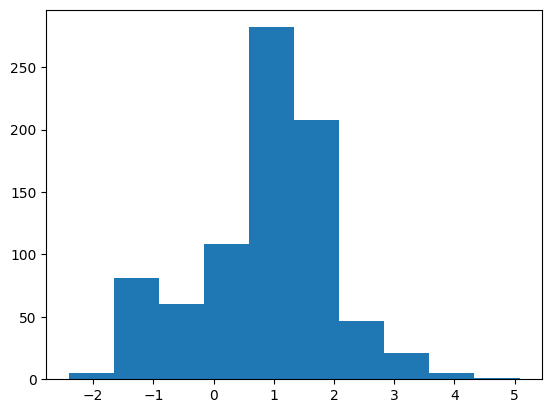

In [52]:
plt.hist((h.values()/np.sqrt(h.variances())).flatten())

In [55]:
idx = (11,5)
h.values()[idx], np.sqrt(h.variances()[idx]), h.values()[idx]/np.sqrt(h.variances()[idx]), 

(282362.2467538633, 55541.31899663593, 5.083823212246105)

In [25]:
buggy_h = uproot.open("/grid_mnt/data__data.polcms/cms/cuisset/cmt/PrePlot2D/ul_2017_ZbbHtt_v12/wjets_MLM/cat_base/prod_240318/data_0.root")["Htt_svfit_mass_ellipse_Zbb_mass_ellipse"]

In [43]:
buggy_h.all_members["fEntries"]

36815.0

In [48]:
buggy_h.variances().size

1750

In [46]:
len(buggy_h.variances())

35

In [50]:
np.sum(buggy_h.values())/buggy_h.all_members["fEntries"]

12.442394817491726

In [45]:
np.sqrt(buggy_h.variances())

array([[ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       [ 0.        ,  7.81659881, 12.11797427, ...,  0.        ,
         0.        ,  0.        ],
       [ 0.        , 21.13324128, 40.12679476, ...,  0.        ,
         0.        ,  0.        ],
       ...,
       [ 0.        , 18.86874129, 42.42300751, ...,  0.        ,
         0.        ,  0.        ],
       [ 0.        ,  8.42150145, 41.01323888, ...,  0.        ,
         0.        ,  0.        ],
       [ 0.        , 19.69167061, 30.07516205, ...,  0.        ,
         0.        ,  0.        ]])

(array([[35.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
        [35.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
        [35.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
        [35.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
        [35.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
        [35.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
        [35.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
        [35.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
        [34.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.],
        [35.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
        [35.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
        [35.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
        [35.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
        [35.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
        [35.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
        [35.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
        [35.,  0.,  0.,  0.,  0.,  0.,  

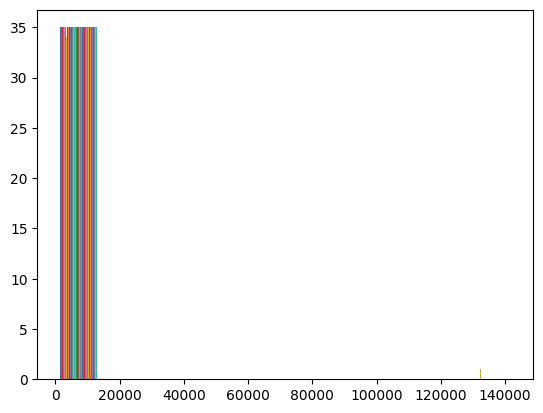

In [28]:
plt.hist(np.sqrt(buggy_h.variances()))

/tmp/ipykernel_244764/3040276831.py:1: RuntimeWarning: invalid value encountered in divide
  plt.hist((buggy_h.values()/np.sqrt(buggy_h.variances())).flatten())


(array([630., 208., 154., 102.,  65.,  52.,  50.,  34.,  17.,   5.]),
 array([ 1.        ,  2.44279106,  3.88558212,  5.32837318,  6.77116424,
         8.21395529,  9.65674635, 11.09953741, 12.54232847, 13.98511953,
        15.42791059]),
 <BarContainer object of 10 artists>)

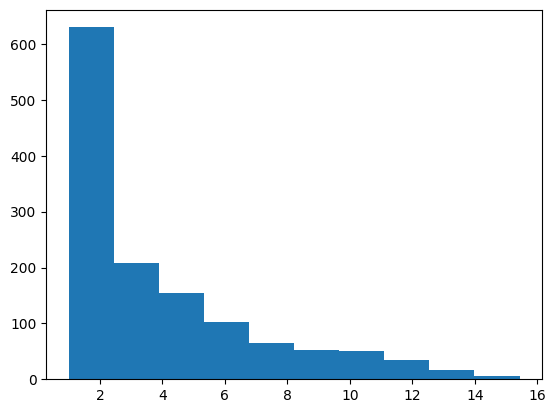

In [27]:
plt.hist((buggy_h.values()/np.sqrt(buggy_h.variances())).flatten())